In [18]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [19]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /Users/starlai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/starlai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/starlai/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [20]:
import os
if not os.path.exists('bbc_text_cls.csv'):
    !wget https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
else:
    print('File already downloaded')

File exists


In [21]:
df = pd.read_csv('bbc_text_cls.csv')
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [22]:
inputs = df['text']
labels = df['labels']

<Axes: >

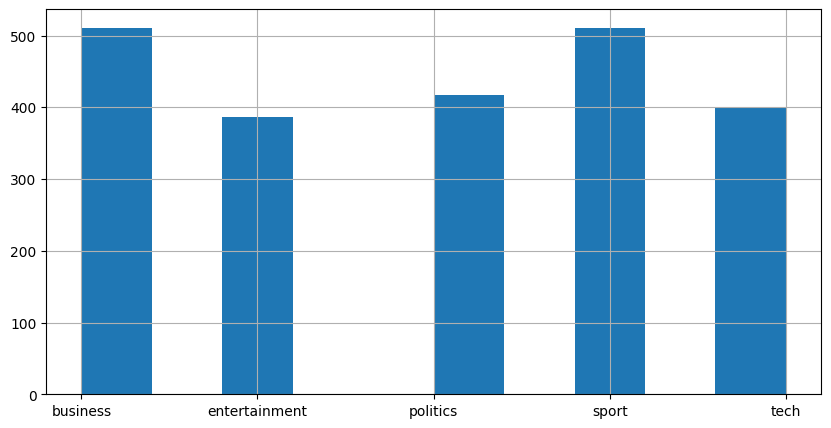

In [23]:
labels.hist(figsize=(10, 5))

In [24]:
inputs_train, inputs_test, Y_train, Y_test = train_test_split(inputs, labels, random_state=123)

In [25]:
vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)

In [26]:
X_train

<1668x26287 sparse matrix of type '<class 'numpy.int64'>'
	with 337411 stored elements in Compressed Sparse Row format>

In [28]:
(X_train !=0).sum(), X_train.shape

(np.int64(337411), (1668, 26287))

In [29]:
(X_train != 0).sum() / np.prod(X_train.shape)

np.float64(0.007695239935415004)

In [30]:
model = MultinomialNB()
model.fit(X_train, Y_train)
print('Train score:', model.score(X_train, Y_train))
print('Test score:', model.score(X_test, Y_test))

Train score: 0.9922062350119905
Test score: 0.9712746858168761


In [31]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [32]:
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        words_and_tags = nltk.pos_tag(tokens)
        return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag))
                for word, tag in words_and_tags]

In [34]:
# With lemmatization
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(X_train, Y_train)
print('Train score:', model.score(X_train, Y_train))
print('Test score:', model.score(X_test, Y_test))

/Volumes/STARLAI/Developments/PyCharmProject/NLP Learn/.venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Train score: 0.9922062350119905
Test score: 0.9676840215439856


In [35]:
class StemTokenizer:
    def __init__(self):
        self.porter = PorterStemmer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        return [self.porter.stem(t) for t in tokens]

In [36]:
# With stemming
vectorizer = CountVectorizer(tokenizer=StemTokenizer())
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(X_train, Y_train)
print('train score:', model.score(X_train, Y_train))
print('test score:', model.score(X_test, Y_test))

/Volumes/STARLAI/Developments/PyCharmProject/NLP Learn/.venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


train score: 0.9892086330935251
test score: 0.9694793536804309


In [37]:
def simple_tokenizer(s):
    return s.split()

In [38]:
# String split tokenizer
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
X_train = vectorizer.fit_transform(inputs_train)
X_test = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(X_train, Y_train)
print('train score:', model.score(X_train, Y_train))
print('test score:', model.score(X_test, Y_test))

train score: 0.9952038369304557
test score: 0.9712746858168761


/Volumes/STARLAI/Developments/PyCharmProject/NLP Learn/.venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
